# Impoting packages and writing method for later use

In [26]:
import pandas as pd
import numpy as np
# import random
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm import tqdm
# import scipy.stats
# from termcolor import colored
# from termcolor import cprint
from include.customer_segmentation_functions import *

In [2]:
data_file= R"D:\Personal_projects\DataSets\online_retail_II.csv"
main_data= pd.read_csv(data_file,encoding ='cp1252')
data= main_data#.sample(1000)

dataset: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data

https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge

# `General view of the data:`

In [3]:
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
172971,505748,85063,CREAM SWEETHEART MAGAZINE RACK,2,2010-04-26 09:13:00,16.95,14897.0,United Kingdom
553551,538626,22357,KINGS CHOICE BISCUIT TIN,3,2010-12-13 12:57:00,4.25,17338.0,United Kingdom
1011572,577700,23322,LARGE WHITE HEART OF WICKER,1,2011-11-21 12:06:00,2.95,14449.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# `Data Preprocessing:`
which involves removing null data, duplicates, unwanted column, etc

In [6]:
#cahnging col name
data.rename(columns = {x:x.lower().replace(' ','') for x in data.columns}, inplace = True)

#change datatype
data['quantity'] = pd.to_numeric(data['quantity'])
data['price'] = pd.to_numeric(data['price'])
data["invoicedate"]=pd.to_datetime(data["invoicedate"])

#removing extra white spaces
data["description"]= data["description"].str.strip()
data.sample(3)

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
260613,514516,40018F,CHERRY DESIGN PAPERLANTERNS,1,2010-07-04 14:27:00,1.95,17406.0,United Kingdom
981982,575694,22982,PANTRY PASTRY BRUSH,1,2011-11-10 16:38:00,1.25,12748.0,United Kingdom
656771,547551,22501,PICNIC BASKET WICKER LARGE,1,2011-03-23 15:55:00,20.79,NaN,United Kingdom


In [7]:
for col_name in ["stockcode", "description", "quantity", "price", "customerid"]:
    get_value_counts(data, col_name)

****************************************
column name: stockcode
****************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 5305
    number of total value: 1067371 (including none)
   number of total Values: 1067371


*******************************************
column name: description
*******************************************
    number of 'NaN' value: 4382
percentage of 'NaN' value: 0.41%
   number of unique value: 5655
    number of total value: 1067371 (including none)
   number of total Values: 1062989


**************************************
column name: quantity
**************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 1057
    number of total value: 1067371 (including none)
   number of total Values: 1067371


********************************
column name: price
********************************
    number of 'NaN' value: 0
percentage of 'NaN

In [8]:
data= drop_nun_val_in_col(data, "customerid")
data= drop_canceled_items(data)

***************************************************************
droping rows where customerid = NaN
***************************************************************
Row counts before droping 'NaN' values: 1067371
 Row counts after droping 'NaN' values: 824364
----------------------------------------
                      Total rows droped: 243007
              Percentage of droped rows: 22.77%


******************************************************
droping rows of canceled items
******************************************************
Number of rows before droping canceled items: 824364
 Number of rows after droping canceled items: 805620


----------------------------------------
                           Total rows droped: 18744
                   Percentage of droped rows: 2.27%




## checking stockcode and description relationships

In [9]:
check_relationship_type(data, "stockcode", "description")

***********************************************************************************************
Checking relationship for 	stockcode -to- description
***********************************************************************************************
*many-to-many


In [10]:
# descr= recheck_relationship_type(data, "description", "stockcode")
# stockc= recheck_relationship_type(data, "stockcode", "description")

In [11]:
# print(len(stockc))
# for val in random.sample(stockc, 5):
#     print(f"{val}: {data[data["stockcode"]==val]["description"].unique()}")

In [12]:
# print(len(descr))
# for val in random.sample(descr, 5):
#     print(f"{val}: {data[data["description"]==val]["stockcode"].unique()}")

##### Here we can see that the stock code and product description don't have a 'one-to-one' relationship due to errors such as typing mistakes and the use of different synonymous words for the same product code. However, we can safely assume that they indeed have a one-to-one relationship and we can drop one of this 2 columns

## checking customer and country relationships(if any customer is associated with more than one country)
very few customer made purched from more than one contry

In [13]:
check_relationship_type(data, "customerid", "customerid")

***********************************************************************************************
Checking relationship for 	customerid -to- customerid
***********************************************************************************************
*many-to-many


In [14]:
# cust_list= recheck_relationship_type(data, "customerid", "country")

In [15]:
# print(len(cust_list))
# for val in random.sample(cust_list, 5):
#     print(f"{val}: {data[data["customerid"]==val]["country"].unique()}")

In [16]:
data.drop(columns=['stockcode'], inplace= True)

#

In [17]:
data['customerid']= data['customerid'].astype(np.int64).astype("string")
data['quantity']= data['quantity'].astype(np.int64)
data["invoicetime"]= data["invoicedate"].dt.time
data["invoicedate"]= data["invoicedate"].dt.date

##### cleaning quantity and unitprice
##### since we have quantity and unit price, we will calculate the total price 

In [18]:
print(data[data["price"]<0]["price"].count())
print(data[data["quantity"]<0]["quantity"].count())

0
0


In [19]:
data["totalprice"]= data["quantity"]* data["price"]
data.sample(3)

,invoice,description,quantity,invoicedate,price,customerid,country,invoicetime,totalprice
987777,575972,SET OF 3 WOODEN HEART DECORATIONS,2,2011-11-13,1.25,14499,United Kingdom,13:01:00,2.5
746990,556254,SEWING SUSAN 21 NEEDLE SET,12,2011-06-09,0.85,13213,United Kingdom,16:57:00,10.2
590404,541683,6 ROCKET BALLOONS,20,2011-01-20,0.65,14085,United Kingdom,15:01:00,13.0


In [20]:
print(f"before cleaning 0 price iteams:\n{data[data["price"] ==0]}")
data= data[data["price"] !=0.0]

before cleaning 0 price iteams:
        invoice                     description  quantity invoicedate  price customerid         country invoicetime  totalprice
4674     489825                6 RIBBONS EMPIRE        12  2009-12-02    0.0      16126  United Kingdom    13:34:00         0.0
6781     489998             DOOR MAT FAIRY CAKE         2  2009-12-03    0.0      15658  United Kingdom    11:19:00         0.0
16107    490727                          Manual         1  2009-12-07    0.0      17231  United Kingdom    16:38:00         0.0
18738    490961   CHRISTMAS PUDDING TRINKET POT         1  2009-12-08    0.0      14108  United Kingdom    15:25:00         0.0
18739    490961     CHRISTMAS CRAFT WHITE FAIRY        12  2009-12-08    0.0      14108  United Kingdom    15:25:00         0.0
...         ...                             ...       ...         ...    ...        ...             ...         ...         ...
1004540  577129     HANGING METAL HEART LANTERN         4  2011-11-17   

In [21]:
print(f"row count before removing duplicates:{len(data)}")
data.drop_duplicates(inplace= True)
print(f" row count after removing duplicates:{len(data)}")

row count before removing duplicates:805549


 row count after removing duplicates:779282


# `Exploratory data analysis (EDA):`

**********************************************************************************************************
Descriptive Stats for ['quantity', 'price', 'totalprice'] :
**********************************************************************************************************
               count       mean         std    min   25%    50%    75%       max    IQR  lower bound  upper bound
quantity    779282.0  13.490720  145.869100  1.000  2.00   6.00  12.00   80995.0  10.00      -13.000       27.000
price       779282.0   3.218750   29.678852  0.001  1.25   1.95   3.75   10953.5   2.50       -2.500        7.500
totalprice  779282.0  22.294482  227.447832  0.001  4.95  12.48  19.80  168469.6  14.85      -17.325       42.075 




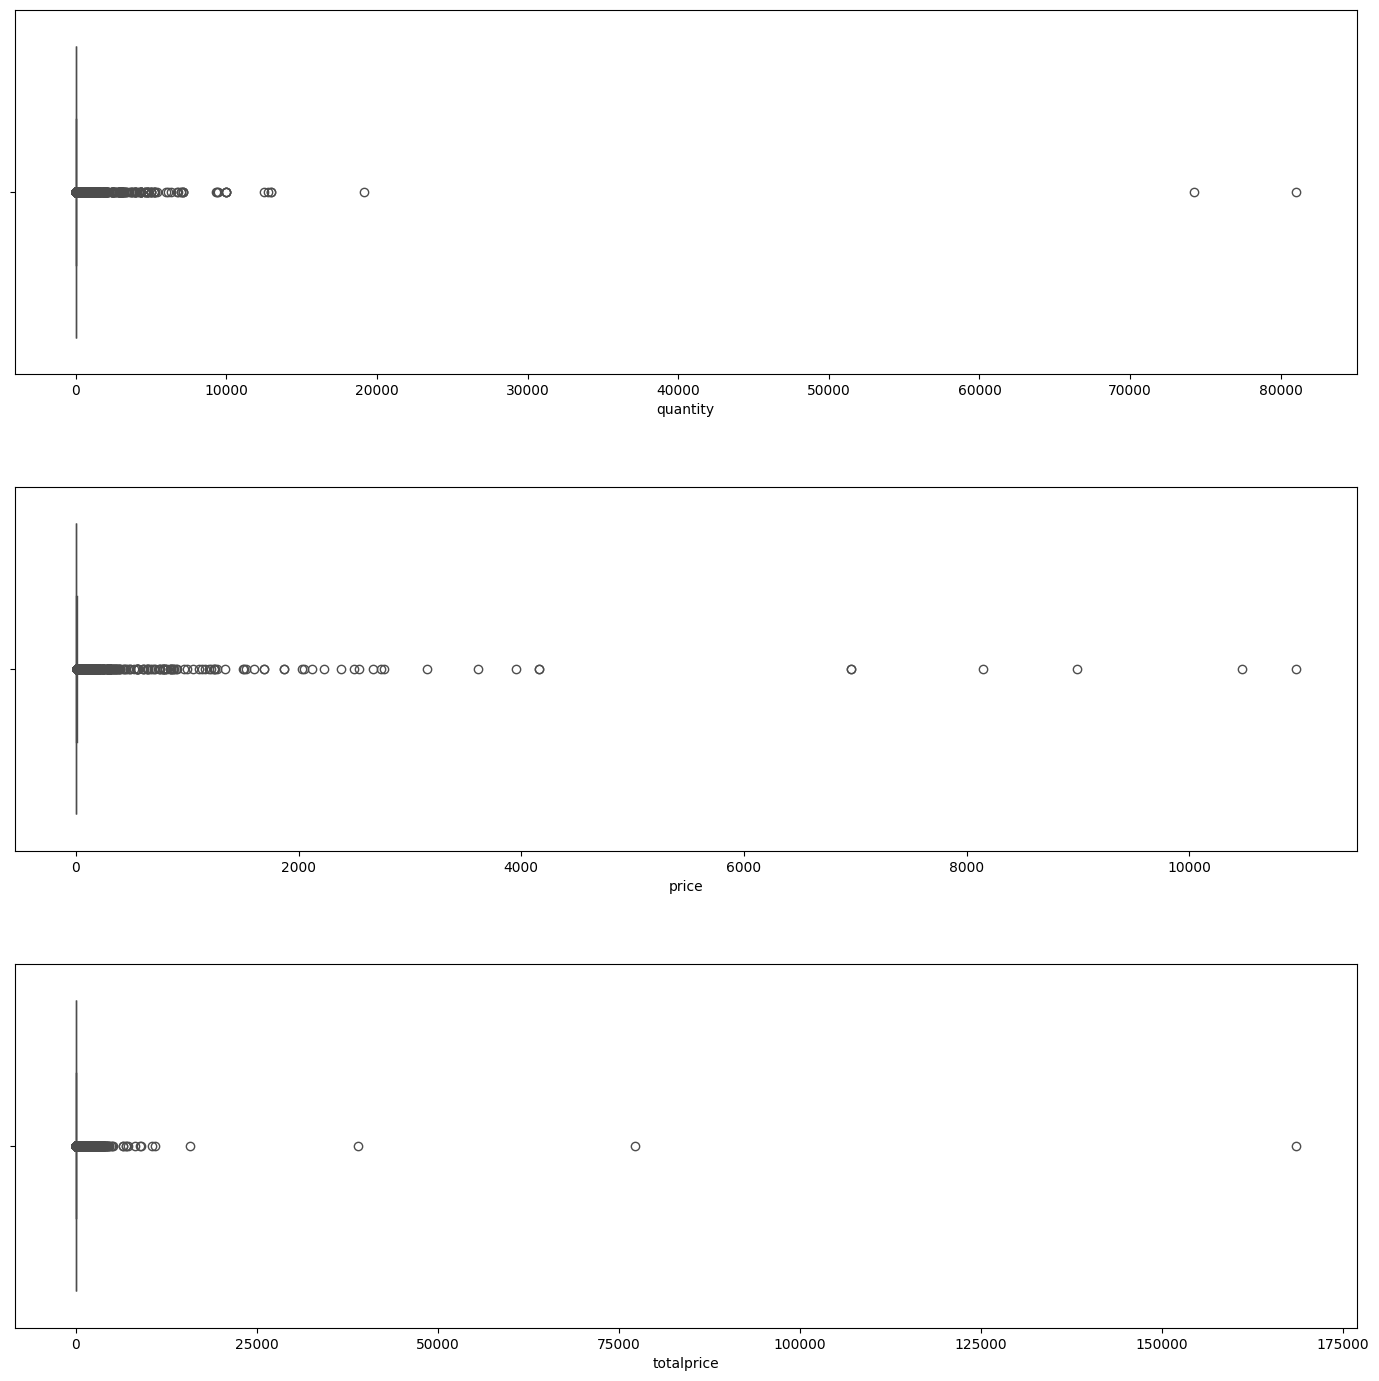

*********************************************************************************************************************************************************************************************
Descriptive Stats for ['invoice', 'description', 'invoicedate', 'customerid', 'country', 'invoicetime'] :
*********************************************************************************************************************************************************************************************
              count unique                                 top    freq
invoice      779282  36969                              576339     542
description  779282   5241  WHITE HANGING HEART T-LIGHT HOLDER    5016
invoicedate  779282    604                          2011-11-06    3340
customerid   779282   5878                               17841   12429
country      779282     41                      United Kingdom  700260
invoicetime  779282    775                            12:36:00    3297 




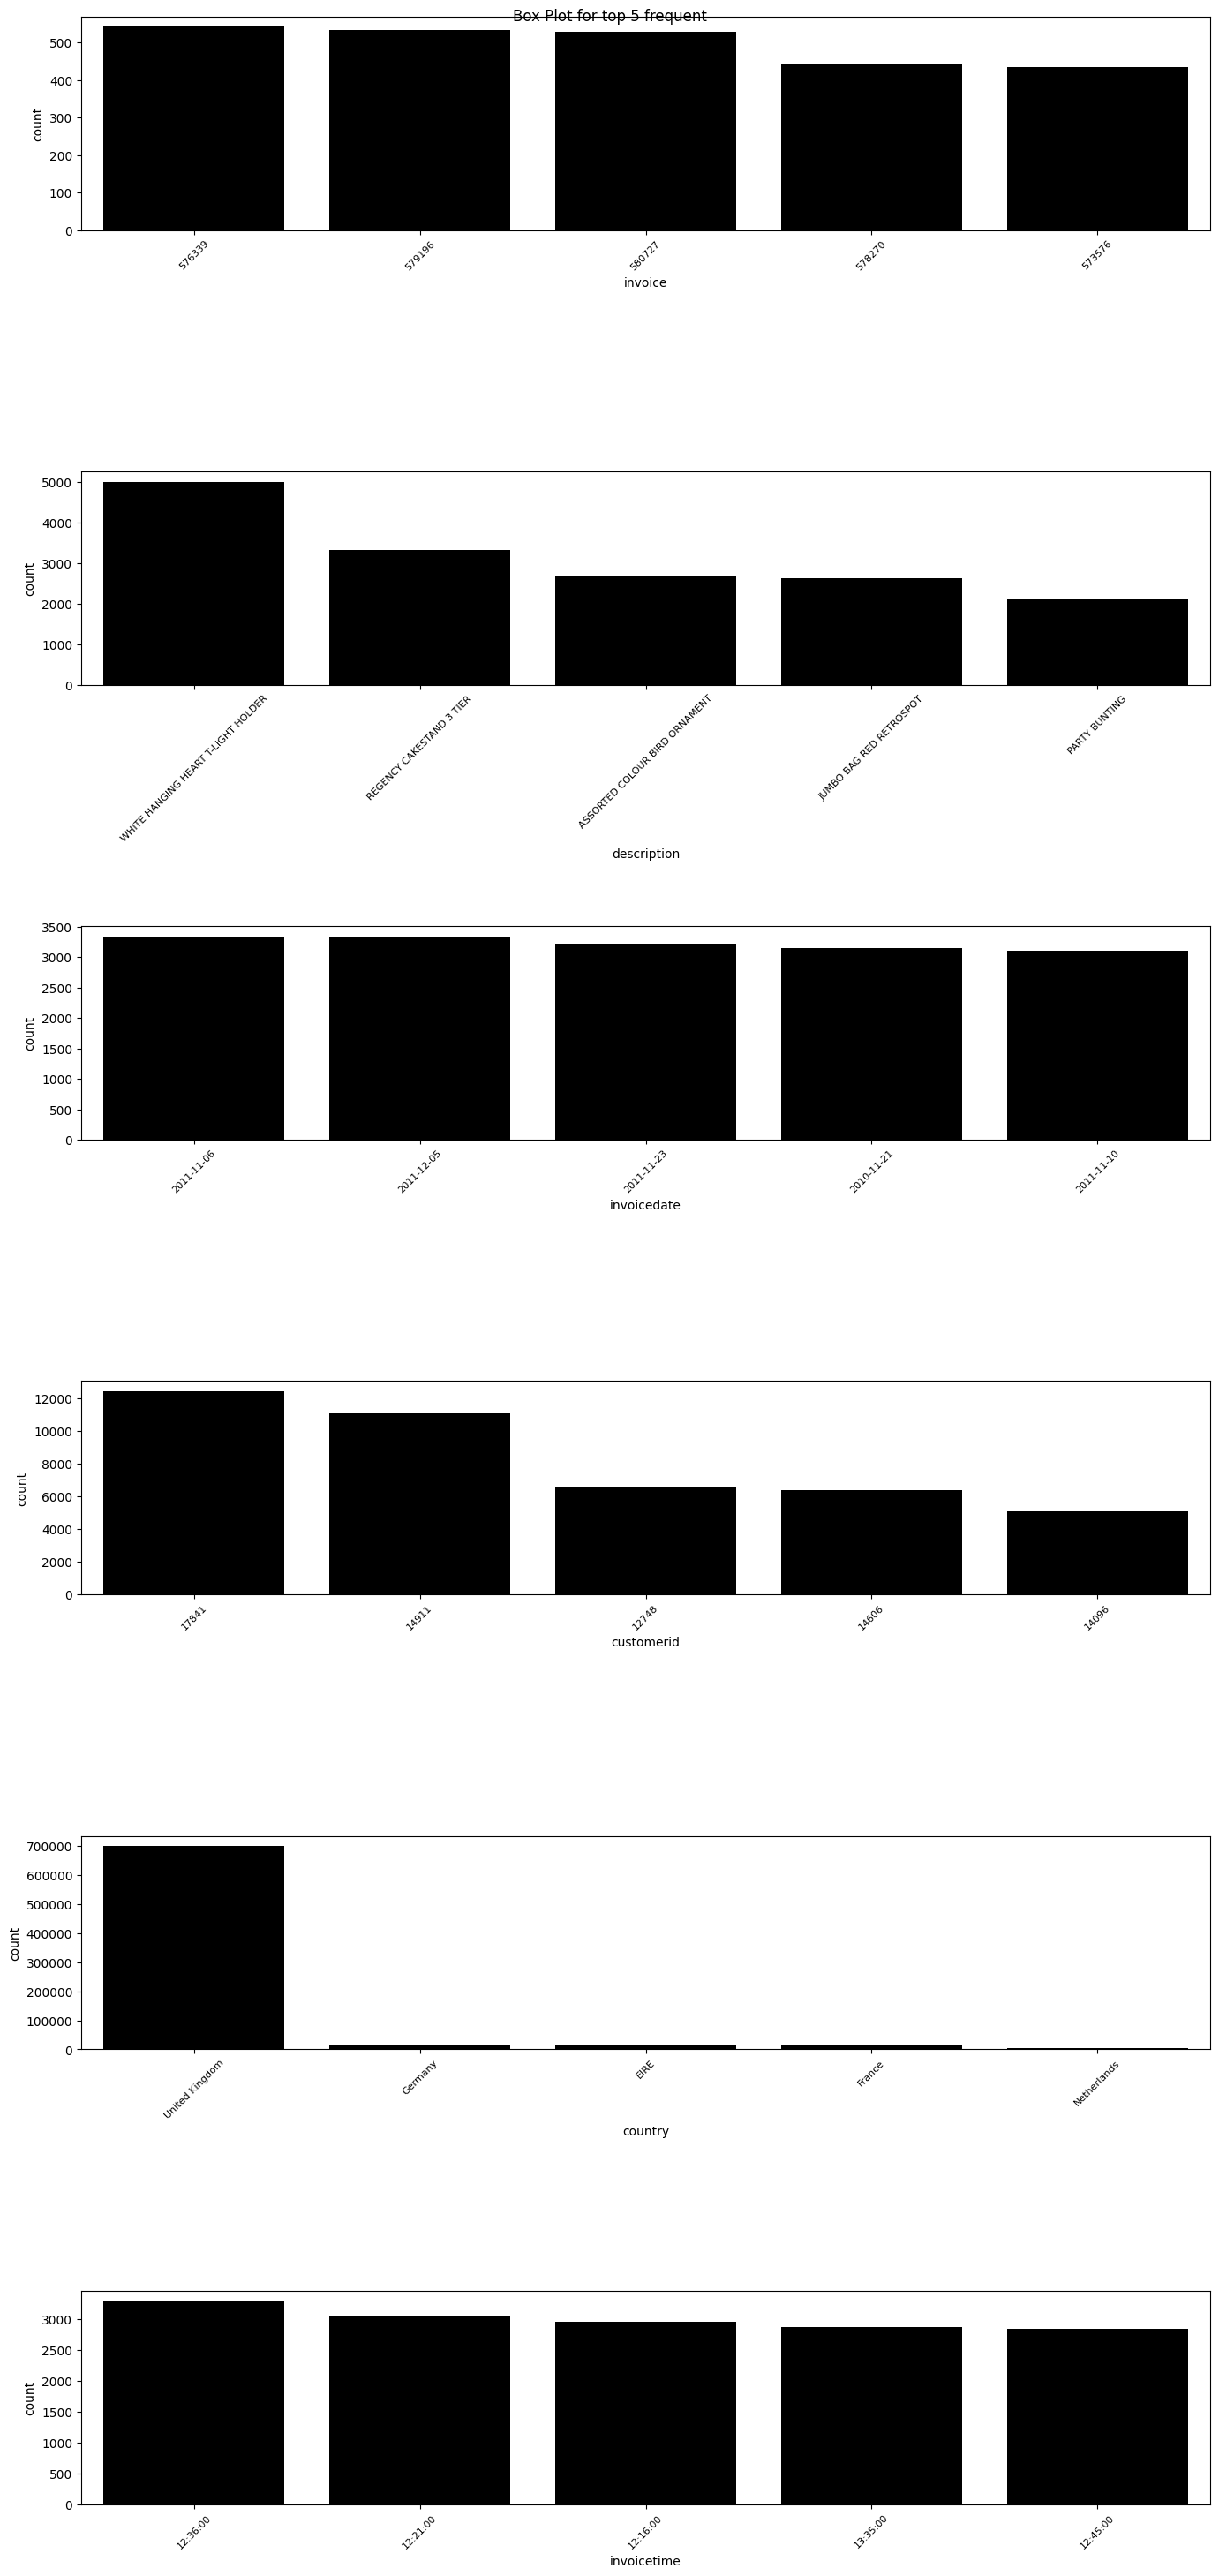

In [22]:
get_descriptive_stats(data, data.columns )

# RFM

In [27]:
RFM= get_rfm_dfset(data)
RFM

,index,customerid,recency,frequency,monetary,interpurchase_time
0,0,12346,325,12,77556.46,33
1,1,12347,2,8,4921.53,50
2,2,12348,75,5,2019.40,72
3,3,12349,18,4,4428.69,142
4,6,12352,36,10,2849.84,35
...,...,...,...,...,...,...
4250,5871,18281,180,2,201.14,198
4251,5872,18282,7,2,178.05,59
4252,5873,18283,3,22,2664.90,29
4253,5876,18286,476,2,1296.43,123
